In [1]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, rename_values, replace_values_by_condition
from ipynb.fs.full.plots import heatmap

In [2]:
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [5]:
df[['D12_ML_Project_Context_Banking', 'D12_ML_Project_Context_Defense', 'D12_ML_Project_Context_Education', 
    'D12_ML_Project_Context_Embedded', 'D12_ML_Project_Context_Entertainment', 'D12_ML_Project_Context_Healthcare',
    'D12_ML_Project_Context_Insurance', 'D12_ML_Project_Context_Logistics', 'D12_ML_Project_Context_Oil', 
    'D12_ML_Project_Context_Sales', 'D12_ML_Project_Context_Tellecom', 'D12_ML_Project_Context_Others',
    'D13_ML_Programming_Language_C', 'D13_ML_Programming_Language_Java', 'D13_ML_Programming_Language_Javascript', 
    'D13_ML_Programming_Language_Julia', 'D13_ML_Programming_Language_MatLab', 'D13_ML_Programming_Language_Python',
    'D13_ML_Programming_Language_R', 'D13_ML_Programming_Language_Others']].head()

,D12_ML_Project_Context_Banking,D12_ML_Project_Context_Defense,D12_ML_Project_Context_Education,D12_ML_Project_Context_Embedded,D12_ML_Project_Context_Entertainment,D12_ML_Project_Context_Healthcare,D12_ML_Project_Context_Insurance,D12_ML_Project_Context_Logistics,D12_ML_Project_Context_Oil,D12_ML_Project_Context_Sales,D12_ML_Project_Context_Tellecom,D12_ML_Project_Context_Others,D13_ML_Programming_Language_C,D13_ML_Programming_Language_Java,D13_ML_Programming_Language_Javascript,D13_ML_Programming_Language_Julia,D13_ML_Programming_Language_MatLab,D13_ML_Programming_Language_Python,D13_ML_Programming_Language_R,D13_ML_Programming_Language_Others
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted
4,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted
5,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted
6,quoted,quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted


In [6]:
context_mapping = {
    'D12_ML_Project_Context_Banking': 'Banking',
    'D12_ML_Project_Context_Defense': 'Defense',
    'D12_ML_Project_Context_Education': 'Education',
    'D12_ML_Project_Context_Embedded': 'Embedded Systems',
    'D12_ML_Project_Context_Entertainment': 'Entertainment',
    'D12_ML_Project_Context_Healthcare': 'Healthcare',
    'D12_ML_Project_Context_Insurance': 'Insurance',
    'D12_ML_Project_Context_Logistics': 'Logistics',
    'D12_ML_Project_Context_Oil': 'Oil & Gas',
    'D12_ML_Project_Context_Sales': 'Sales',
    'D12_ML_Project_Context_Tellecom': 'Telecommunication',
    'D12_ML_Project_Context_Others': 'Others'
}

language_mapping = {
    'D13_ML_Programming_Language_C': 'C/C++',
    'D13_ML_Programming_Language_Java': 'Java',
    'D13_ML_Programming_Language_Javascript': 'Javascript',
    'D13_ML_Programming_Language_Julia': 'Julia',
    'D13_ML_Programming_Language_MatLab': 'MatLab',
    'D13_ML_Programming_Language_Python': 'Python',
    'D13_ML_Programming_Language_R': 'R',
    'D13_ML_Programming_Language_Others': 'Others'
}

In [14]:
contexts = []
languages = []
context_language = []
for index, row in df.iterrows():
    for c in context_mapping:
        for l in language_mapping:
            # formatted name for context
            contexts.append(context_mapping[c])
            # what did the guy who answered an specific framework about agility
            languages.append(language_mapping[l])
            # match
            if row[c] == 'not quoted':
                # context is not appliable for this language
                context_language.append(0)
            elif row[c] == 'quoted':
                # context was quoted, so we need to check if the current language also was
                if row[l] == 'not quoted':
                    context_language.append(0)
                elif row[l] == 'quoted':
                    # only case that we really have a match
                    context_language.append(1)

In [15]:
# create a custom dataframe to handle only the columns that we want
d12_13_df = pd.DataFrame()
d12_13_df['Context'] = contexts
d12_13_df['Language'] = languages
d12_13_df['Answers'] = context_language

In [17]:
d12_13_df = d12_13_df.groupby(['Context', 'Language']).sum().reset_index()

In [21]:
d12_13_df

,Context,Language,Answers
0,Banking,C/C++,8
1,Banking,Java,16
2,Banking,Javascript,11
3,Banking,Julia,1
4,Banking,MatLab,5
...,...,...,...
91,Telecommunication,Julia,0
92,Telecommunication,MatLab,2
93,Telecommunication,Others,4
94,Telecommunication,Python,28


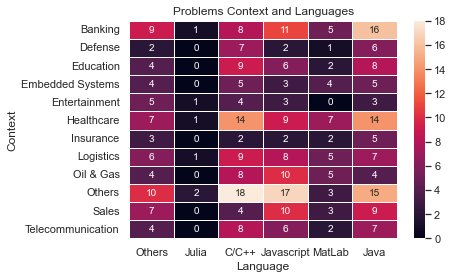

In [22]:
heatmap(d12_13_df, 'Context', 'Language', 'Answers', order=[5, 3, 0, 2, 4, 1], title='Problems Context and Languages')